In [42]:
import numpy as np
import scipy

import matplotlib.pyplot as pl
from sklearn.kernel_ridge import KernelRidge
import sklearn as skl

from tools.helpers import Progress

In [6]:
def mix_gauss(means, sigmas, samples):
    return [sigma * np.random.randn(samples, 2) + np.array(mean)[None, :]
            for mean, sigma in zip(means, sigmas)]

In [7]:
data = mix_gauss([(0, 0), (1, 1)], [.5, .25], 1000)

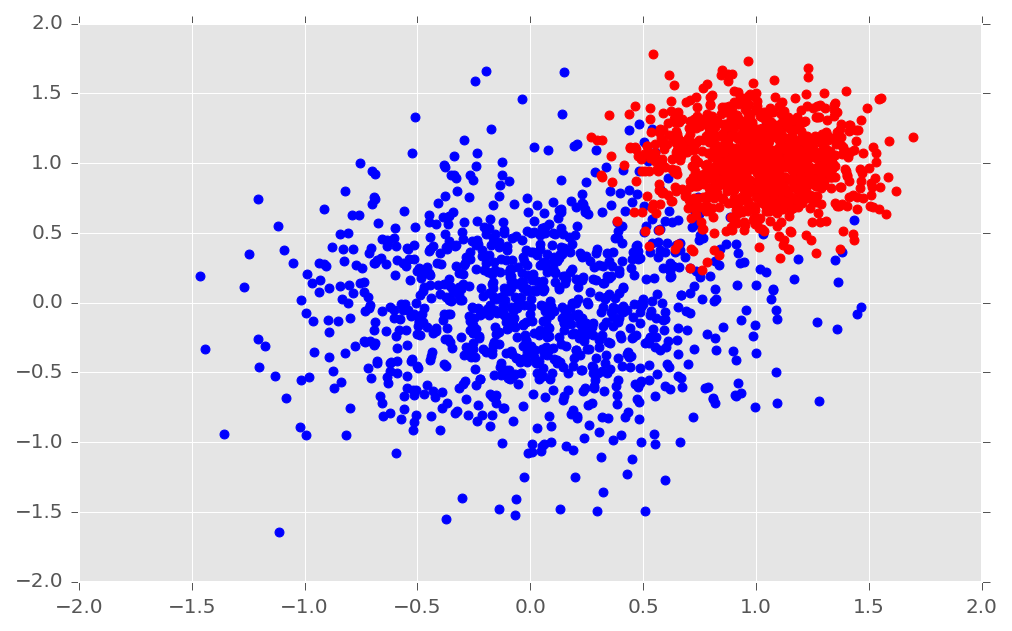

In [8]:
for x, c in zip(data, ['b', 'r']):
    pl.scatter(x[:, 0], x[:, 1], color=c)

In [9]:
X = np.reshape(data, (2000, 2))
y = np.concatenate((np.zeros(1000), np.ones(1000))).astype(int)

In [10]:
x_min, x_max = -2, 2
y_min, y_max = -2, 2
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max + h, h),
                     np.arange(y_min, y_max + h, h))

(-2, 2, -2, 2)

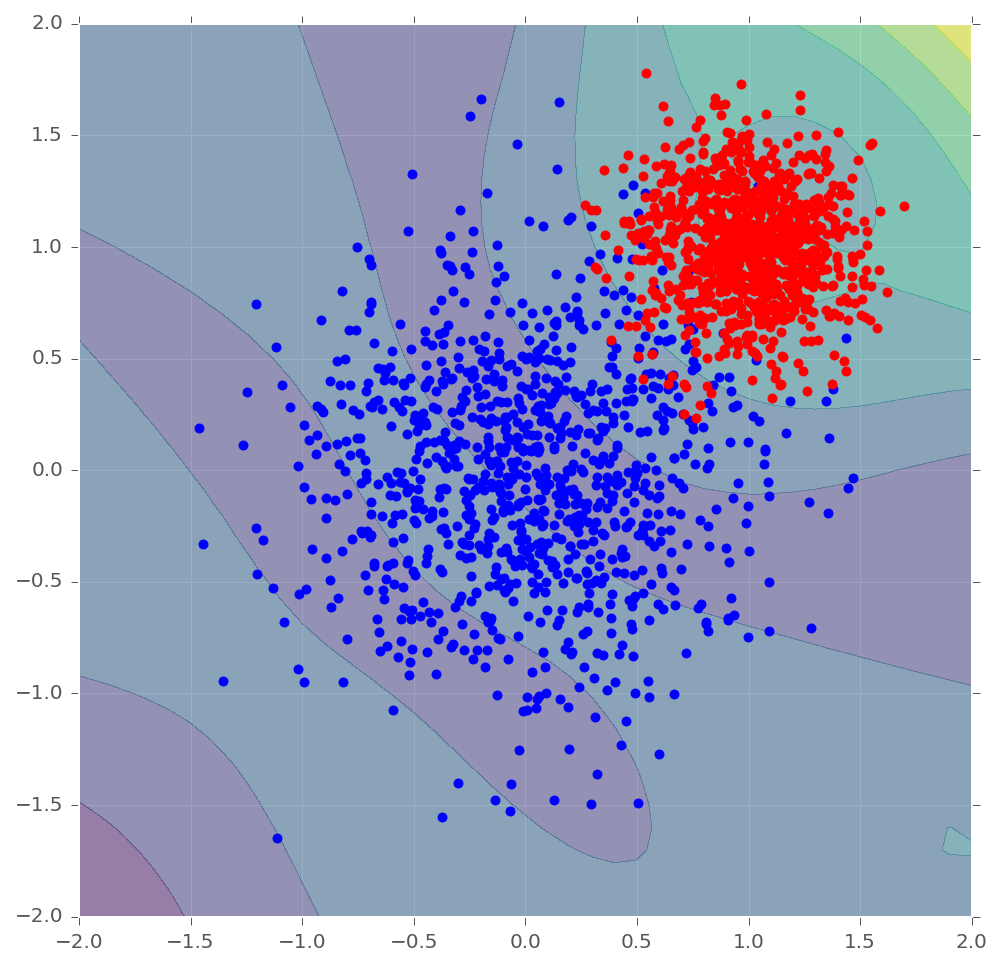

In [16]:
pl.figure(0, figsize=(8, 8))
model = KernelRidge(alpha=.01, kernel='rbf')
model.fit(X, y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.contourf(xx, yy, Z, alpha=0.5)

for x, c in zip(data, ['b', 'r']):
    pl.scatter(x[:, 0], x[:, 1], color=c)

pl.axis((x_min, x_max, y_min, y_max))

In [22]:
from scipy import io

data = io.loadmat('/Users/dsuess/Downloads/Lab/moons_dataset.mat')

In [23]:
list(data)

['__globals__', 'Yts', 'Ytr', '__header__', 'Xtr', '__version__', 'Xts']

In [30]:
X = np.concatenate((data['Xtr'], data['Xts']))
y = np.concatenate((data['Ytr'], data['Yts']))

(-1.3141865820206633,
 0.80085626465716686,
 -1.6774104385590278,
 1.1606079540390035)

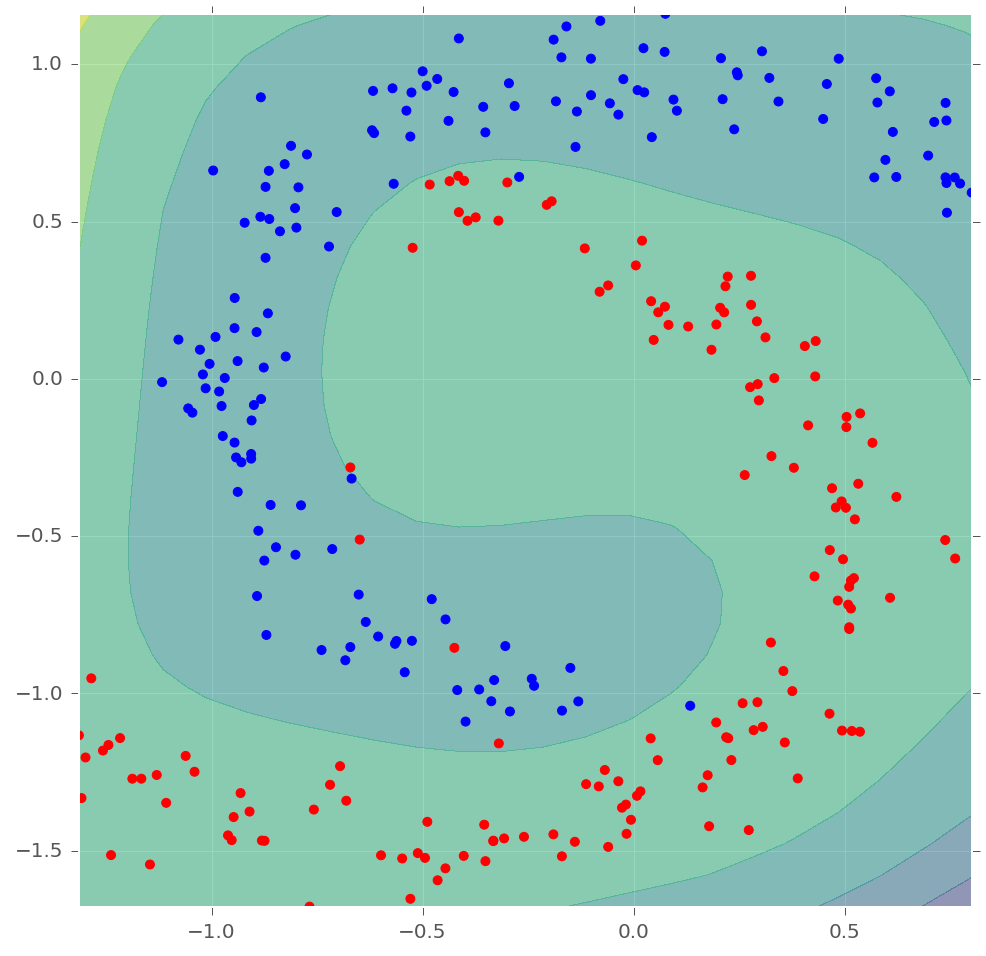

In [51]:
pl.figure(0, figsize=(8, 8))

model = KernelRidge(alpha=.00001, kernel='rbf')
model.fit(X, y)


x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max + h, h),
                     np.arange(y_min, y_max + h, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.contourf(xx, yy, Z, alpha=0.5)

pl.scatter(X[:, 0], X[:, 1], color=['b' if this_y == -1 else 'r' 
                                    for this_y in y])

pl.axis((x_min, x_max, y_min, y_max))

In [38]:
X_train, X_test, y_train, y_test = skl.cross_validation.train_test_split(
    X, y, test_size=.4, random_state=0
)

In [41]:
np.logspace(1, 2, 10)

array([  10.        ,   12.91549665,   16.68100537,   21.5443469 ,
         27.82559402,   35.93813664,   46.41588834,   59.94842503,
         77.42636827,  100.        ])

100% (100 of 100) |#######################| Elapsed Time: 0:00:00 Time: 0:00:00


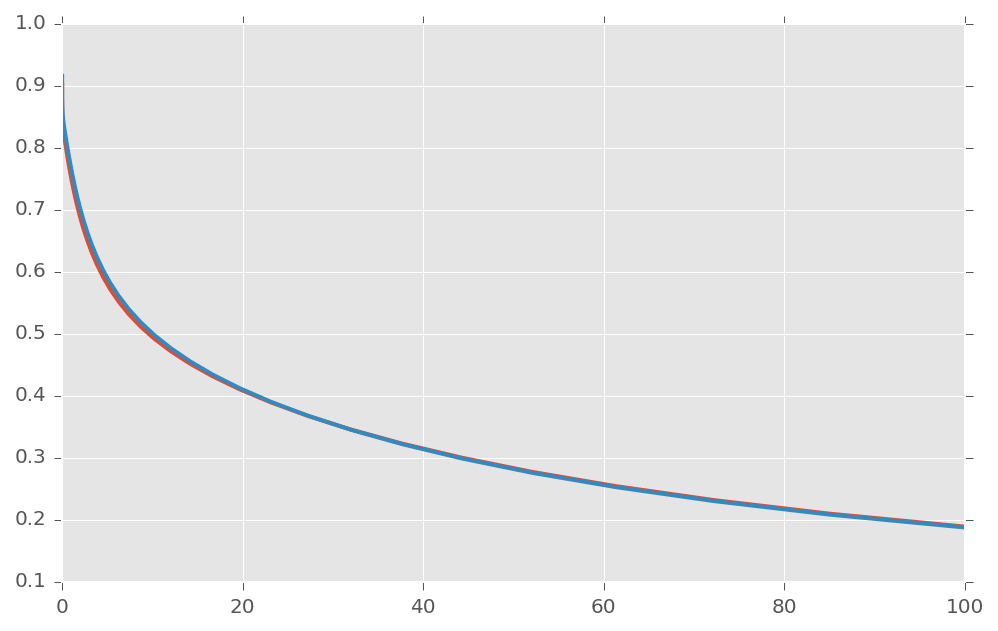

In [50]:
alphas = np.logspace(-5, 2, 100)
models = [KernelRidge(alpha=alpha, gamma=None, kernel='rbf').fit(X_train, y_train)
          for alpha in Progress(alphas)]

pl.plot(alphas, [model.score(X_test, y_test) for model in models])
pl.plot(alphas, [model.score(X_train, y_train) for model in models])